# EXPERIMENT 1_2: MagFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.stats_tables import *

from IPython import embed


In [2]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/mag_1_2/'


# Load data

In [3]:
feature_list_children = '../../data/data_full/feature_vectors/magface_feature_vectors/1.1/feature_vectors_from_children_filtered_bibel_FINAL_INFERENCE_baseline_ex_1_1.list'

def load_and_compute_similarity(feature_list, dtype=np.float32):
    # Load data
    image_names, ids, num_ids, norm_feats = load_magface_vectors(feature_list)

    # Convert dtype to reduce memory usage
    norm_feats = norm_feats.astype(dtype)

    # Compute similarity matrix incrementally if possible
    sim_mat = np.dot(norm_feats, norm_feats.T)

    return image_names, ids, num_ids, sim_mat


In [4]:
# Load and compute for children
image_names_c, ids_c, num_ids_c, sim_mat_c = load_and_compute_similarity(feature_list_children)


/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_5.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_m.04n3v0_/m.04n3v0__0002.jpg
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_3.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_19.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_21.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_26.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_38.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_16

In [5]:

# Load and compute for adults
image_names_a, ids_a, num_ids_a, sim_mat_a = load_and_compute_similarity(feature_list_children)


/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_5.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_m.04n3v0_/m.04n3v0__0002.jpg
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_3.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_19.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_21.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_26.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_38.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_16

In [6]:


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_canonical_df_BIBLE.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

# Finding the threshold

In [7]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.03).tolist()

df_all_threshold_x = compute_metrics_ex_1_2(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.0
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.03
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.06
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.09
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.12
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.15
FPD result:  0.0
FND result:  0.3335693779904306
GARBE result, GARBE close to 1 means more unfair:  0.25017703349282294
Done for random_state: 1, percentile: 0.18
FPD result:  0.0
FND result:  0.36

/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.0
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.03
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.06
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.09
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.12
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 2, percentile: 0.15
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 2, percentile: 0.18
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means mo

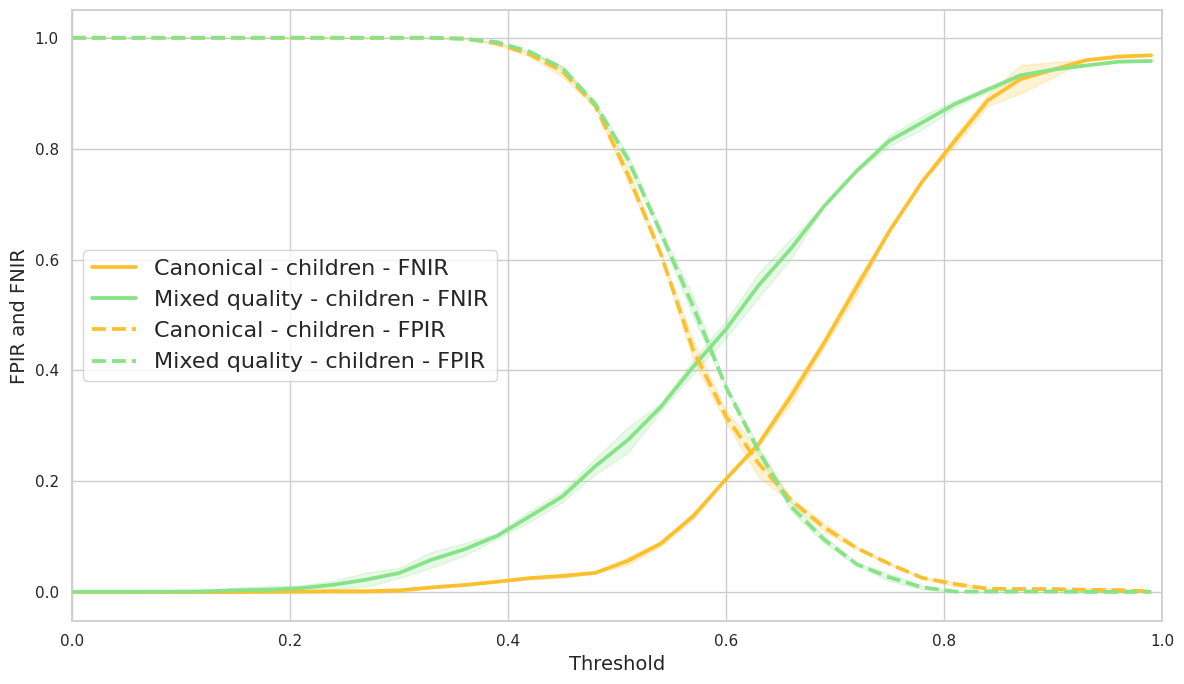

In [8]:

def plot_threshold_metrics_ex_1_2_w_conf(df_all_threshold_x, title,save_fig_path):
    # Set the aesthetics for the plots
    sns.set(style="whitegrid")

    plot_df_mean = df_all_threshold_x.groupby('Threshold').mean()
    plot_df_std = df_all_threshold_x.groupby('Threshold').std()
    count = df_all_threshold_x.groupby('Threshold').size().values

    # Calculate the 95% confidence intervals
    ci_factor = 1.96
    plot_df_ci = plot_df_std / np.sqrt(count[:, None]) * ci_factor

    plt.figure(figsize=(12, 7))

    # Plot FNIR with confidence intervals
    plt.plot(plot_df_mean.index, plot_df_mean['FNIR_c'], color='#FBC02D', linestyle='-', label='Canonical - children - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_mean.index, plot_df_mean['FNIR_c'] - plot_df_ci['FNIR_c'], plot_df_mean['FNIR_c'] + plot_df_ci['FNIR_c'], color='#FBC02D', alpha=0.2)
    plt.plot(plot_df_mean.index, plot_df_mean['FNIR_a'], color='#88E288', linestyle='-', label='Mixed quality - children - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_mean.index, plot_df_mean['FNIR_a'] - plot_df_ci['FNIR_a'], plot_df_mean['FNIR_a'] + plot_df_ci['FNIR_a'], color='#88E288', alpha=0.2)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FNIR and FPIR', fontsize=14)
    # plt.title('FNIR vs Threshold', fontsize=16)
    plt.xlim(0.0, 1)
    plt.legend(fontsize=16)
    plt.grid(True)

    # Plot FPIR with confidence intervals
    plt.plot(plot_df_mean.index, plot_df_mean['FPIR_c'], color='#FBC02D', linestyle='--', label='Canonical - children - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_mean.index, plot_df_mean['FPIR_c'] - plot_df_ci['FPIR_c'], plot_df_mean['FPIR_c'] + plot_df_ci['FPIR_c'], color='#FBC02D', alpha=0.2)
    plt.plot(plot_df_mean.index, plot_df_mean['FPIR_a'], color='#88E288', linestyle='--', label='Mixed quality - children - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_mean.index, plot_df_mean['FPIR_a'] - plot_df_ci['FPIR_a'], plot_df_mean['FPIR_a'] + plot_df_ci['FPIR_a'], color='#88E288', alpha=0.2)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FPIR and FNIR', fontsize=14)
    # plt.title('FPIR and FNIR vs Threshold', fontsize=16)
    plt.xlim(0.0, 1)
    plt.legend(fontsize=16)
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'{save_fig_path}TH.png')

    # Show the plot
    plt.show()

plot_threshold_metrics_ex_1_2_w_conf(df_all_threshold_x, 'MagFace ex. 1.2', save_fig_path)

# Stats - 10 experiment

In [7]:

random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results, sim_mat_dict_all_magface_ex1_2 = evaluate_metrics_ex_1_2(
    random_states, children_all, adults_all, image_names_c, image_names_a,
    sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, 0.320#df_all_threshold_x[df_all_threshold_x.FNIR_a <0.05].Threshold.max()
)

NEW FPD result:  1.0
NEW FND result:  6.039673413063477
NEW GARBE result, GARBE close to 1 means more unfair:  4.779755059797608
done
NEW FPD result:  1.0
NEW FND result:  5.65171939477304
NEW GARBE result, GARBE close to 1 means more unfair:  4.48878954607978
done
NEW FPD result:  1.0
NEW FND result:  4.6164269335001045
NEW GARBE result, GARBE close to 1 means more unfair:  3.7123202001250784
done
NEW FPD result:  1.0
NEW FND result:  5.056591321564098
NEW GARBE result, GARBE close to 1 means more unfair:  4.042443491173073
done
NEW FPD result:  1.0
NEW FND result:  6.276730608840701
NEW GARBE result, GARBE close to 1 means more unfair:  4.957547956630526
done
NEW FPD result:  1.0014347202295553
NEW FND result:  3.9580483356133147
NEW GARBE result, GARBE close to 1 means more unfair:  3.218894931767375
done
NEW FPD result:  1.0
NEW FND result:  3.9824235846083824
NEW GARBE result, GARBE close to 1 means more unfair:  3.236817688456287
done
NEW FPD result:  1.0
NEW FND result:  7.58234

In [8]:
# Generate the LaTeX table
from scipy.stats import describe, gaussian_kde

latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)


\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{0} & 0.009 & 0.057 & 1.000 & 1.000 & 1.000 & 6.040 & 4.780 & 0.320 \\
\textbf{1} & 0.008 & 0.044 & 1.000 & 1.000 & 1.000 & 5.652 & 4.489 & 0.320 \\
\textbf{2} & 0.010 & 0.047 & 1.000 & 1.000 & 1.000 & 4.616 & 3.712 & 0.320 \\
\textbf{3} & 0.009 & 0.044 & 1.000 & 1.000 & 1.000 & 5.057 & 4.042 & 0.320 \\
\textbf{4} & 0.008 & 0.052 & 1.000 & 1.000 & 1.000 & 6.277 & 4.958 & 0.320 \\
\textbf{5} & 0.012 & 0.046 & 0.999 & 1.000 & 1.001 & 3.958 & 3.219 & 0.320 \\
\textbf{6} & 0.010 & 0.041 & 1.000 & 1.000 & 1.000 & 3.982 & 3.237 & 0.320 \\
\textbf{7} & 0.007 & 0.054 & 1.000 & 1.000 & 1.000 & 7.582 & 5.937 & 0.320 \\
\textbf{8} & 0.011 & 0.047 & 1.000 & 1.000 & 1.000 & 4.197 & 3.398 & 0.320 \\
\textbf{9} & 0.006 & 0.048 & 1.000 & 1.000 & 1.000 & 7.880 & 6.160 & 0.320 

/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_8221/508068997.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [9]:

latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{count} & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 \\
\textbf{mean} & 0.009 & 0.048 & 1.000 & 1.000 & 1.000 & 5.524 & 4.393 & 0.320 \\
\textbf{std} & 0.002 & 0.005 & 0.000 & 0.000 & 0.000 & 1.425 & 1.068 & 0.000 \\
\textbf{min} & 0.006 & 0.041 & 0.999 & 1.000 & 1.000 & 3.958 & 3.219 & 0.320 \\
\textbf{25%} & 0.008 & 0.044 & 1.000 & 1.000 & 1.000 & 4.302 & 3.477 & 0.320 \\
\textbf{50%} & 0.009 & 0.047 & 1.000 & 1.000 & 1.000 & 5.354 & 4.266 & 0.320 \\
\textbf{75%} & 0.010 & 0.051 & 1.000 & 1.000 & 1.000 & 6.217 & 4.913 & 0.320 \\
\textbf{max} & 0.012 & 0.057 & 1.000 & 1.000 & 1.001 & 7.880 & 6.160 & 0.320 \\
\bottomrule
\end{tabular} 
\end{table}



/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_8221/3591699641.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [10]:
df_all_results.to_csv('df_all_results_mag_1_2.csv', index=False)


# Stats

In [11]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_c'], df_all_results['FNIR_a'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: -21.398997514550363
P-value: 4.997411820305296e-09


# Saving sim to plot all of the dist 

In [12]:
# Add together all

# make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10
# List to hold all the arrays
sim_mat_c_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_2:
        sim_mat_c_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_2[key])

# Concatenate all arrays into one big array
sim_mat_c_enrolled_iterations_all = np.concatenate(sim_mat_c_enrolled_iterations)
sim_mat_c_enrolled_iterations_all = pd.DataFrame(sim_mat_c_enrolled_iterations_all)
sim_mat_c_enrolled_iterations_all.to_csv('sim_mat_c_enrolled_iterations_all_mag_1_2.csv', index=False)
# Print the big array
print(len(sim_mat_c_enrolled_iterations_all))



# Add together all

# make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10

# List to hold all the arrays
sim_mat_a_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_2:
        sim_mat_a_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_2[key])

# Concatenate all arrays into one big array
sim_mat_a_enrolled_iterations_all = np.concatenate(sim_mat_a_enrolled_iterations)
sim_mat_a_enrolled_iterations_all = pd.DataFrame(sim_mat_a_enrolled_iterations_all)
sim_mat_a_enrolled_iterations_all.to_csv('sim_mat_a_enrolled_iterations_all_mag_1_2.csv', index=False)


# Print the big array
print(len(sim_mat_a_enrolled_iterations_all))

# Add together all

# make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10

# List to hold all the arrays
sim_mat_c_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_2:
        sim_mat_c_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_2[key])

sim_mat_c_non_enrolled_iterations_all = np.concatenate(sim_mat_c_non_enrolled_iterations)
sim_mat_c_non_enrolled_iterations_all = pd.DataFrame(sim_mat_c_non_enrolled_iterations_all)
sim_mat_c_non_enrolled_iterations_all.to_csv('sim_mat_c_non_enrolled_iterations_all_mag_1_2.csv', index=False)
# Print the big array
print(len(sim_mat_c_non_enrolled_iterations_all))



sim_mat_a_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_2:
        sim_mat_a_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_2[key])

sim_mat_a_non_enrolled_iterations_all = np.concatenate(sim_mat_a_non_enrolled_iterations)
sim_mat_a_non_enrolled_iterations_all = pd.DataFrame(sim_mat_a_non_enrolled_iterations_all)
sim_mat_a_non_enrolled_iterations_all.to_csv('sim_mat_a_non_enrolled_iterations_all_mag_1_2.csv', index=False)

# Print the big array
print(len(sim_mat_a_non_enrolled_iterations_all))


91850
125196
14218887
32751054


# Load pre-saved stuff

In [31]:

# Loading pre-saved stuff
sim_mat_c_enrolled_iterations_all = (pd.read_csv('sim_mat_c_enrolled_iterations_all_mag_1_2.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all = (pd.read_csv('sim_mat_a_enrolled_iterations_all_mag_1_2.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all_mag_1_2.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all_mag_1_2.csv')).values.flatten()


# From DET utils - check import

In [32]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [33]:
mated_scores1 = sim_mat_a_enrolled_iterations_all
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,125196.000000,3.275105e+07
1,Minimum,-0.023164,-4.297026e-01
2,Maximum,0.996555,9.998632e-01
3,Mean,0.634160,1.806749e-01
4,St. Dev.,0.140595,1.292758e-01
5,Skewness,-0.438950,2.752332e-01
6,Ex. Kurtosis,0.295455,3.918235e-02


In [34]:

mated_scores2 = sim_mat_c_enrolled_iterations_all

nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

,Statistic,Mated,Non-mated
0,Observations,91850.000000,1.421889e+07
1,Minimum,0.084974,-4.199412e-01
2,Maximum,0.996555,9.998632e-01
3,Mean,0.663254,1.883834e-01
4,St. Dev.,0.131433,1.320223e-01
5,Skewness,-0.449222,3.030009e-01
6,Ex. Kurtosis,0.201319,1.568636e-01


In [35]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 12
label_fontsize = 16

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

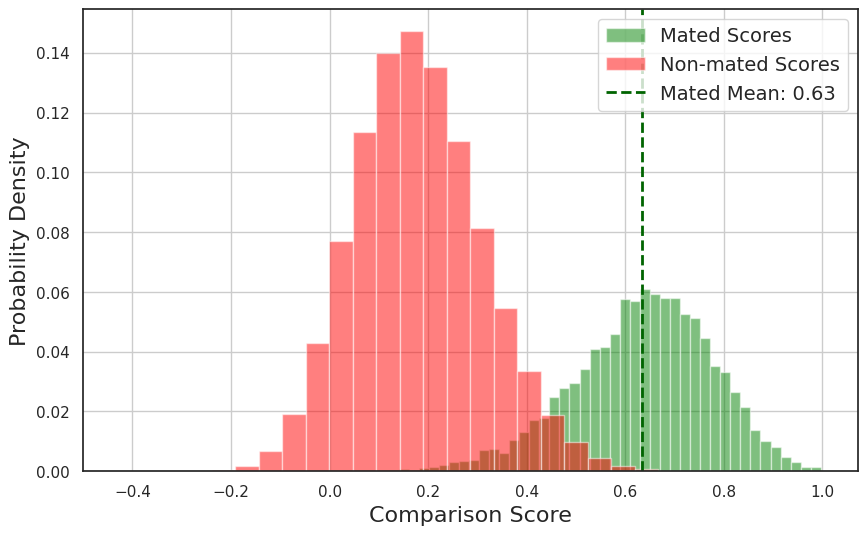

In [36]:

def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None, title="Histogram", save_fig_path="save_fig_path", gem_som = 'A1'):
    def normalise_scores(distribution):
        return np.ones_like(distribution) / len(distribution)

    mated_mean = np.mean(mated_scores)

    plt.figure(figsize=(10, 6))

    if normalise:
        plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color='green', alpha=0.5, label='Mated Scores')
        plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color='red', alpha=0.5, label='Non-mated Scores')
        ylabel = "Probability Density"
    else:
        plt.hist(mated_scores, bins=50, color='green', alpha=0.5, label='Mated Scores')
        plt.hist(nonmated_scores, bins=30, color='red', alpha=0.5, label='Non-mated Scores')
        ylabel = "Count"

    plt.axvline(mated_mean, color='darkgreen', linestyle='--', linewidth=2, label=f'Mated Mean: {mated_mean:.2f}')

    plt.xlabel("Comparison Score", size=16)
    plt.ylabel(ylabel, size=16)
    # plt.title(title, size=20)
    plt.grid(True)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=14)  # Adjust legend parameters as needed

    plt.savefig(f'{save_fig_path}{gem_som}.png')

    # plt.cla()
    # plt.clf()
    # plt.close()

    # if savename is not None:
    #     plt.savefig(savename, bbox_inches="tight")
    #     plt.cla()
    #     plt.clf()
    #     plt.close()
    # else:
    plt.show()
plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Mixed-quality children - MagFace ex. 1.2 ', save_fig_path=save_fig_path, gem_som='M1')


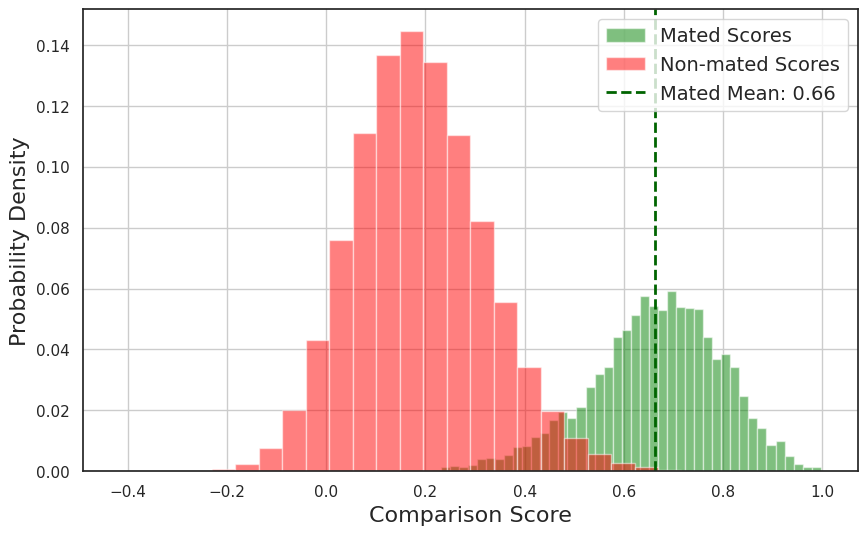

In [37]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True,title = 'Canonical children - MagFace ex. 1.2 ', save_fig_path=save_fig_path, gem_som='Can1')


# DET curves

In [38]:
from DET_utils.DET_plots import *
from DET_utils.DET import *

In [39]:
mated_kde, mated_pos, mated_min, mated_max = get_kde(mated_scores1)
nonmated_kde, nonmated_pos, nonmated_min, nonmated_max = get_kde(nonmated_scores1)

In [40]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))


d' child = 3.35782
d' adult = 3.60494


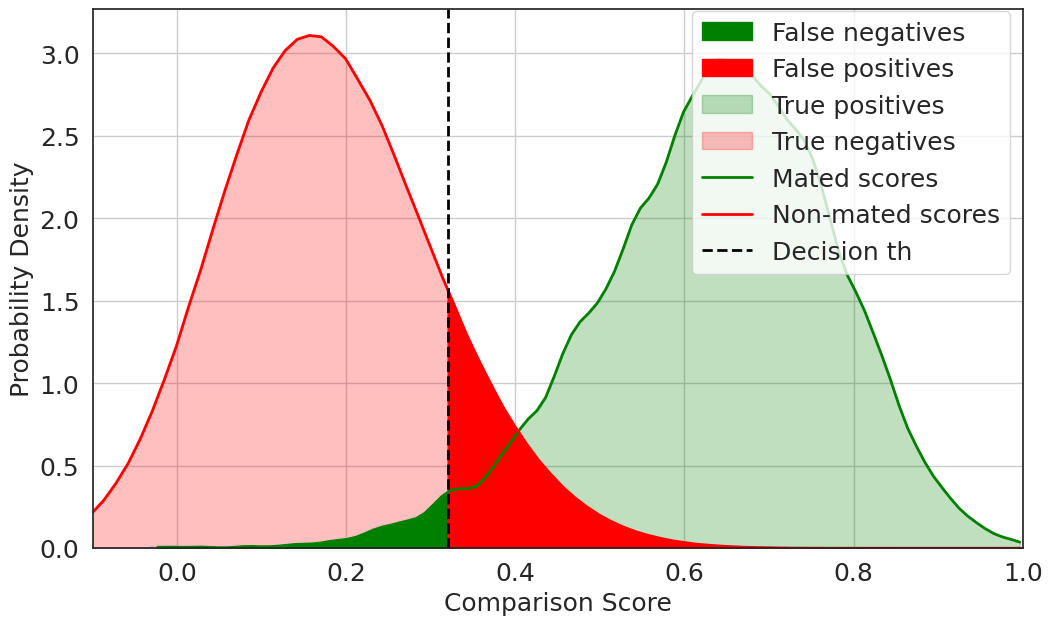

In [41]:
# threshold1 = df_all_threshold_x[df_all_threshold_x.FNIR_a <0.05].Threshold.max()
threshold1 = 0.320
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1, save_fig_path=save_fig_path, title='M2')

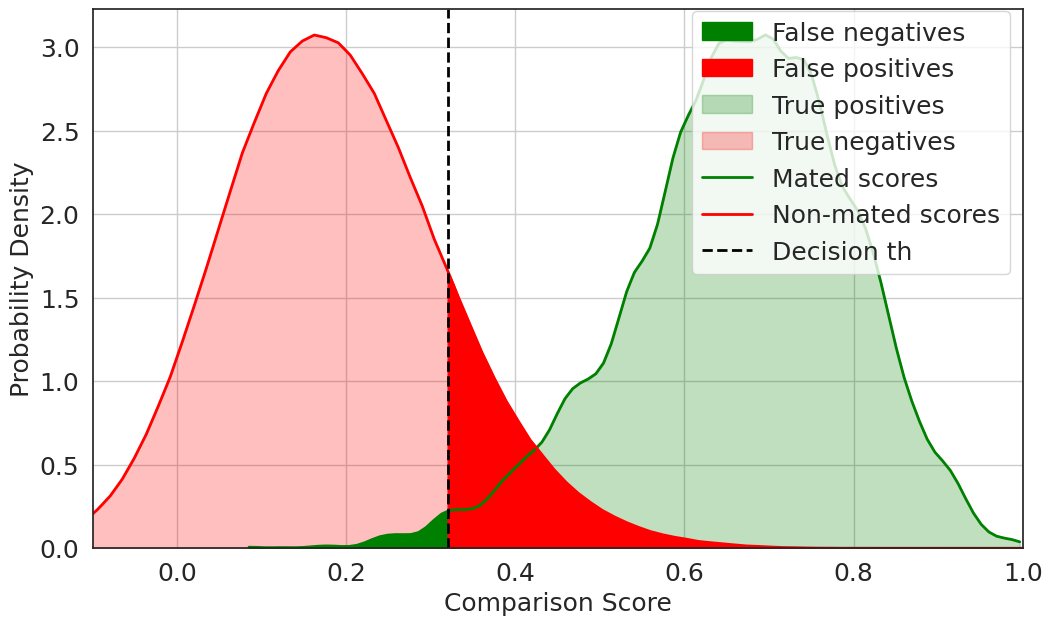

In [42]:
# threshold2 = df_all_threshold_x[df_all_threshold_x.FNIR_a <0.05].Threshold.max()
threshold2 = 0.320
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2, save_fig_path=save_fig_path, title='Can2')

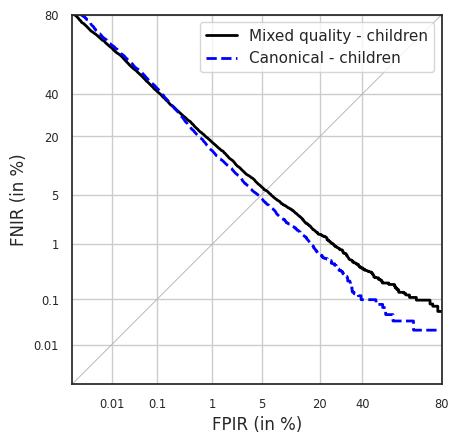

In [43]:
def DET_plotting_1_2(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, score_type= "similarity",title = 'Canonical vs Mixed-quality - AdaFace ex. 2.2', save_fig_path= 'save_fig_path'):

    figure_size = (12,7)
    alpha_shade = 0.25
    alpha_fill = 1.0
    linewidth = 2
    legend_loc = "upper left"
    legend_anchor = (1.0, 1.02)
    legend_cols = 1
    legend_fontsize = 18
    label_fontsize = 18
    tick_fontsize = 18

    system_name1 = 'Mixed quality - children'
    system_name2 = 'Canonical - children'

    det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True)#, plot_title=title)
    det.x_limits = np.array([1e-5, .8])
    det.y_limits = np.array([1e-5, .8])
    det.x_ticks = np.array([1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 80e-2])
    det.x_ticklabels = np.array(['0.01','0.1', '1', '5', '20', '40', '80'])
    det.y_ticks = np.array([1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 80e-2])
    det.y_ticklabels = np.array(['0.01','0.1', '1', '5', '20', '40', '80'])
    det.create_figure()
    det.plot(tar=adjust_scores_for_DET(mated_scores1, score_type), non=adjust_scores_for_DET(nonmated_scores1, score_type), label=system_name1)
    det.plot(tar=adjust_scores_for_DET(mated_scores2, score_type), non=adjust_scores_for_DET(nonmated_scores2, score_type), label=system_name2)
    det.legend_on(loc="upper right")
    det.show()
DET_plotting_1_2(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, "similarity",'Canonical vs Mixed-quality - MagFace ex. 1.2', save_fig_path)
